# Тестовое задание на позицию “Аналитик данных”

Имеется набор данных. Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.  
Ссылка: [Набор данных](https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing)

## Задание 1

a) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?  
b) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?  
c) Какие подгруппы товаров наиболее часто покупают за последний год (минимум 4 группы)?

**Подгруппа** – `Sub-Category`  
**Дата** – `Order_date`

Сделать вывод на основе полученных результатов.

## Задание 2

Построить boxplot («Ящик с усами») на основе продаж (`Sales`). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

## Задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе `Sales`.  
Сгруппировать данные на основе региона и группы продаж (`Region`, `Sale_group`). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

---

### Замечания:  
Работу лучше выполнить в jupyter и там же написать выводы по каждому заданию. После выполнения загрузите код на GitHub.


In [1]:
! pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train - train.csv")

In [4]:
# Задание 1a: Самые часто покупаемые подкатегории товаров за всё время
def top_subcategories_all_time(df):
    return df['Sub-Category'].value_counts().nlargest(4)

In [5]:
# Задание 1b: Самые часто покупаемые подкатегории товаров за последние два года
def top_subcategories_last_two_years(df):
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
    max_date = df['Order Date'].max()
    last_two_years = df[df['Order Date'] >= max_date - pd.DateOffset(years=2)]
    return last_two_years['Sub-Category'].value_counts().nlargest(4)

In [6]:
# Задание 1c: Самые часто покупаемые подкатегории товаров за последний год
def top_subcategories_last_year(df):
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
    max_date = df['Order Date'].max()
    last_year = df[df['Order Date'] >= max_date - pd.DateOffset(years=1)]
    return last_year['Sub-Category'].value_counts().nlargest(4)

In [7]:
# Задание 2: Построение boxplot для продаж (с удалением выбросов по правилу 3 сигм)
def sales_boxplot(df):
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
    sales_mean = df['Sales'].mean()
    sales_std = df['Sales'].std()
    lower_bound = sales_mean - 3 * sales_std
    upper_bound = sales_mean + 3 * sales_std
    filtered_sales = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

    # Построение boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_sales, y='Sales')
    plt.title('Boxplot продаж (без выбросов)')
    plt.show()

In [8]:
# Задание 3: Группировка продаж по регионам и определение групп продаж (малые, средние, высокие)
def sales_group_by_region(df):
    df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
    low_quantile = df['Sales'].quantile(0.33)
    high_quantile = df['Sales'].quantile(0.67)

    # Определение групп продаж
    df['Sale_group'] = pd.cut(df['Sales'], bins=[0, low_quantile, high_quantile, df['Sales'].max()],
                              labels=['Низкий', 'Средний', 'Высокий'])

    # Группировка по регионам и группам продаж
    sales_region_group = df.groupby(['Region', 'Sale_group']).agg({'Sales': 'sum'}).reset_index()

    # Построение графика
    plt.figure(figsize=(12, 6))
    sns.barplot(data=sales_region_group, x='Region', y='Sales', hue='Sale_group')
    plt.title('Продажи по регионам и группам продаж')
    plt.show()

    return sales_region_group

In [9]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Уникальные значения в столбце '{column}':")
        print(unique_values)
        print("-" * 50)

In [10]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [12]:
print_unique_values(df)

Уникальные значения в столбце 'ID':
[ 646  907  908 ...  741  742 7981]
--------------------------------------------------
Уникальные значения в столбце 'Order Date':
['30/12/2018' '29/12/2018' '28/12/2018' ... '05/01/2015' '04/01/2015'
 '03/01/2015']
--------------------------------------------------
Уникальные значения в столбце 'Class':
['Стандарт' 'Первый класс' 'Второй класс' 'Same Day']
--------------------------------------------------
Уникальные значения в столбце 'Region':
['Урал' 'Владивосток' 'Калиниград' 'Москва']
--------------------------------------------------
Уникальные значения в столбце 'Sub-Category':
['Appliances' 'Bookcases' 'Phones' 'Binders' 'Fasteners' 'Chairs' 'Paper'
 'Furnishings' 'Art' 'Storage' 'Labels' 'Accessories' 'Tables' 'Supplies'
 'Machines' 'Copiers' 'Envelopes']
--------------------------------------------------
Уникальные значения в столбце 'Sales':
['37229,08' '20994,61' '42133,86' ... '20415,81' '4559,085' '11726,47']
--------------------------

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


<Axes: >

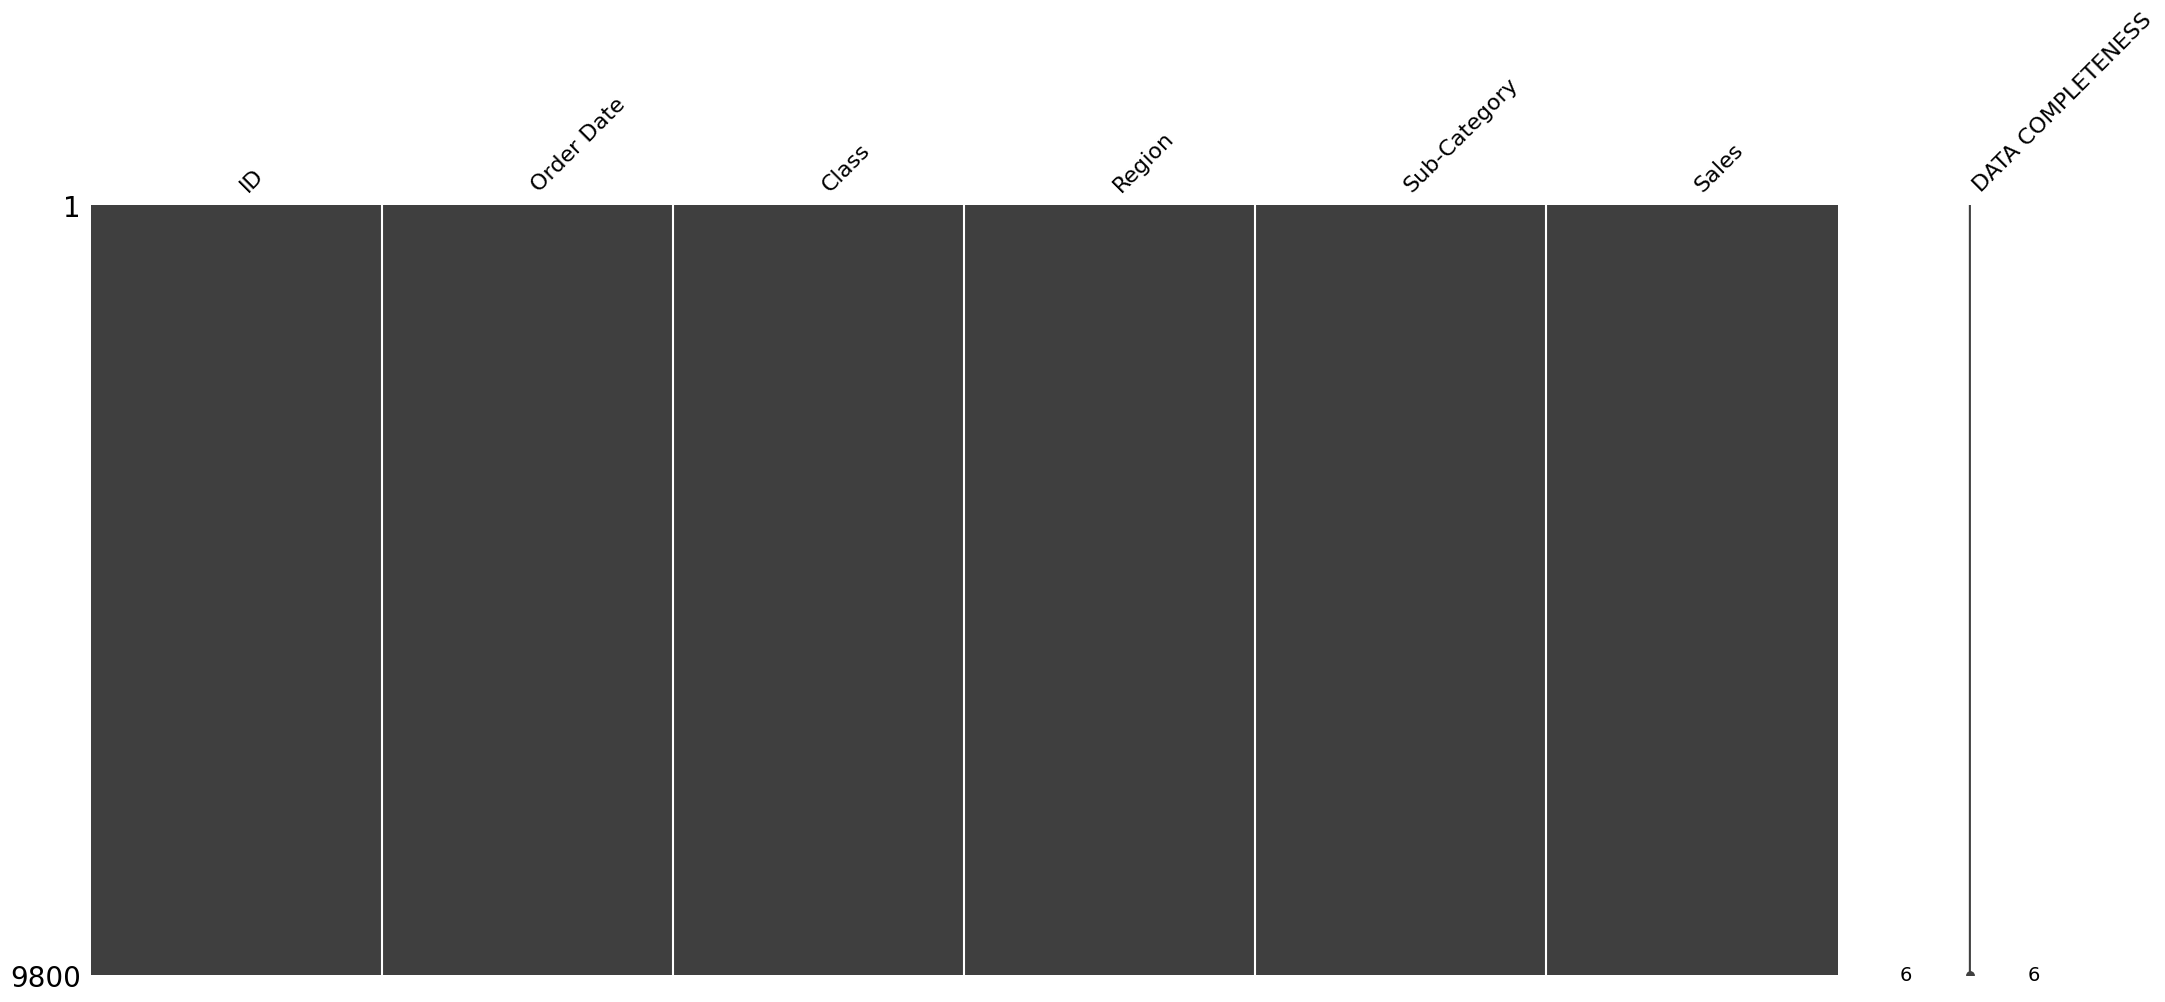

In [14]:
#визуализируем целостность набора данных, для дальнейшей их обработки
msno.matrix(df, labels=True)

In [15]:
# Задание 1a: Самые часто покупаемые подкатегории товаров (за всё время)
print("Топ подкатегорий товаров (за всё время):")
top_subcategories_all_time_df = top_subcategories_all_time(df)
print(top_subcategories_all_time_df)

Топ подкатегорий товаров (за всё время):
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64


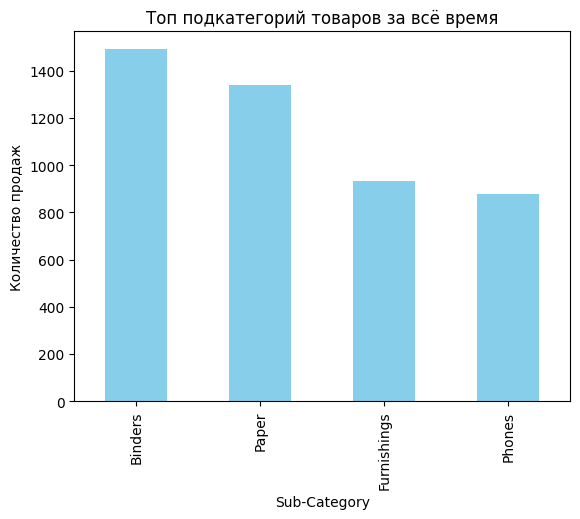

In [16]:
# Построение столбчатой диаграммы
top_subcategories_all_time_df.plot(kind='bar', color='skyblue')

# Добавление заголовка и подписей к осям
plt.title('Топ подкатегорий товаров за всё время')
plt.xlabel('Sub-Category')
plt.ylabel('Количество продаж')

# Показать график
plt.show()

***Вывод по заданию 1а***

В датасете представлены данные за период с 2015-01-03 по 2018-12-30.
В топ-4 подкатегорий товаров на которые приходятся основное количество продаж это:        
  - Binders         
  - Paper           
  - Furnishings     
  - Phones          

In [17]:
top_subcategories_last_two_years_df = top_subcategories_last_two_years(df)

In [18]:
print(f'Начальная дата в исходных данных {df["Order Date"].min()}')

Начальная дата в исходных данных 2015-01-03 00:00:00


In [19]:
print(f'Крайняя дата в исходных данных {df["Order Date"].max()}')

Крайняя дата в исходных данных 2018-12-30 00:00:00


In [20]:
# Задание 1b: Самые часто покупаемые подкатегории товаров (за последние 2 года)
print("Топ подкатегорий товаров (за последние два года):")
print(top_subcategories_last_two_years_df)

Топ подкатегорий товаров (за последние два года):
Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: count, dtype: int64


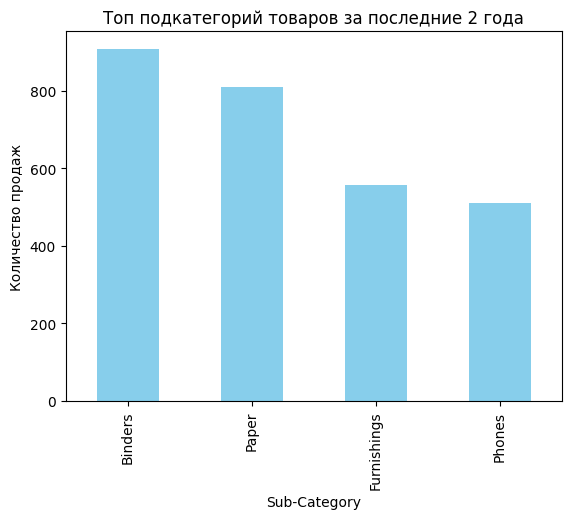

In [21]:
# Построение столбчатой диаграммы
top_subcategories_last_two_years_df.plot(kind='bar', color='skyblue')

# Добавление заголовка и подписей к осям
plt.title('Топ подкатегорий товаров за последние 2 года')
plt.xlabel('Sub-Category')
plt.ylabel('Количество продаж')

# Показать график
plt.show()

***Вывод по заданию 1b***

За последние два года картина не изменилась, в топ-4 подкатегорий все также входят Binders, Paper, Furnishings и Phones. Чаще всего покупают Binders.

In [22]:
# Задание 1c: Самые часто покупаемые подкатегории товаров (за последний год)
top_subcategories_last_year_df = top_subcategories_last_year(df)
print("Топ подкатегорий товаров (за последний год):")
print(top_subcategories_last_year_df)

Топ подкатегорий товаров (за последний год):
Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: count, dtype: int64


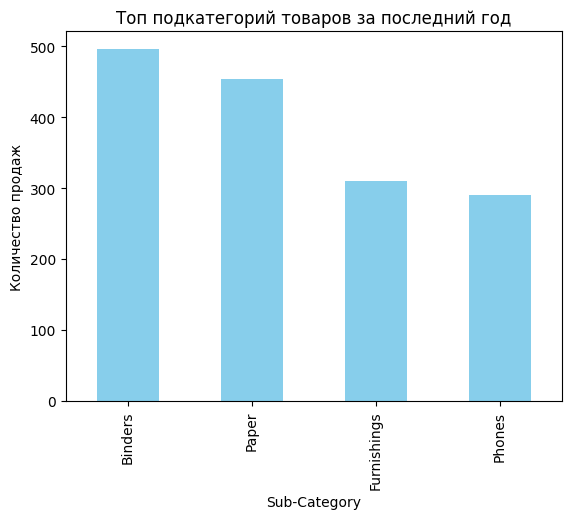

In [23]:
top_subcategories_last_year_df.plot(kind='bar', color='skyblue')

# Добавление заголовка и подписей к осям
plt.title('Топ подкатегорий товаров за последний год')
plt.xlabel('Sub-Category')
plt.ylabel('Количество продаж')

# Показать график
plt.show()

***Вывод по заданию 1c***

Данные за последний год показывает что подкатегории Binders, Paper, Furnishings и Phones стабильно держатся в топ-4 подкатегорий по продажам. Каждая из подкатегорий удерживает свои позиции с 1 по 4 место соответственно.

Boxplot продаж с удалением выбросов:


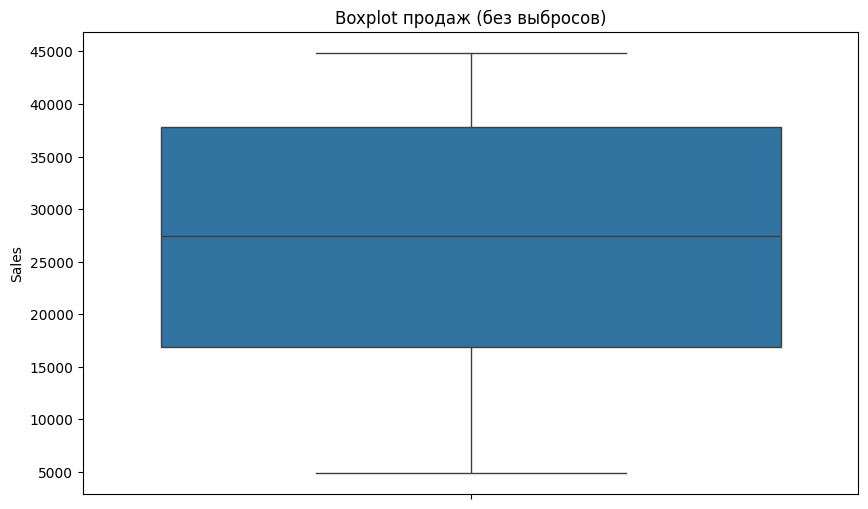

In [24]:
# Задание 2: Построение boxplot для продаж (с удалением выбросов)
print("Boxplot продаж с удалением выбросов:")
sales_boxplot(df)

***Вывод по заданию 2***

На предоставленном boxplot отображены данные о продажах (Sales) без выбросов, выбросы отсечены по правилу трех сигм.

Минимальное значение продаж — около 5000.
Максимальное значение продаж — около 45 000.

Горизонтальная линия внутри коробки — это точка, ниже и выше которой находятся 50% значений данных. Она примерно посередине коробки, что говорит о том, что данные относительно симметричны. Медианное значение продаж находится чуть выше 25 000. Проще говоря, основные продажи распределены около 25000.

Синяя коробка показывает диапазон, в котором находится средняя половина всех продаж и этот диапозон находится в пределах 16000 - 37000.

Группировка продаж по регионам и группам продаж:


<ipython-input-8-e61af4229e7a>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_region_group = df.groupby(['Region', 'Sale_group']).agg({'Sales': 'sum'}).reset_index()


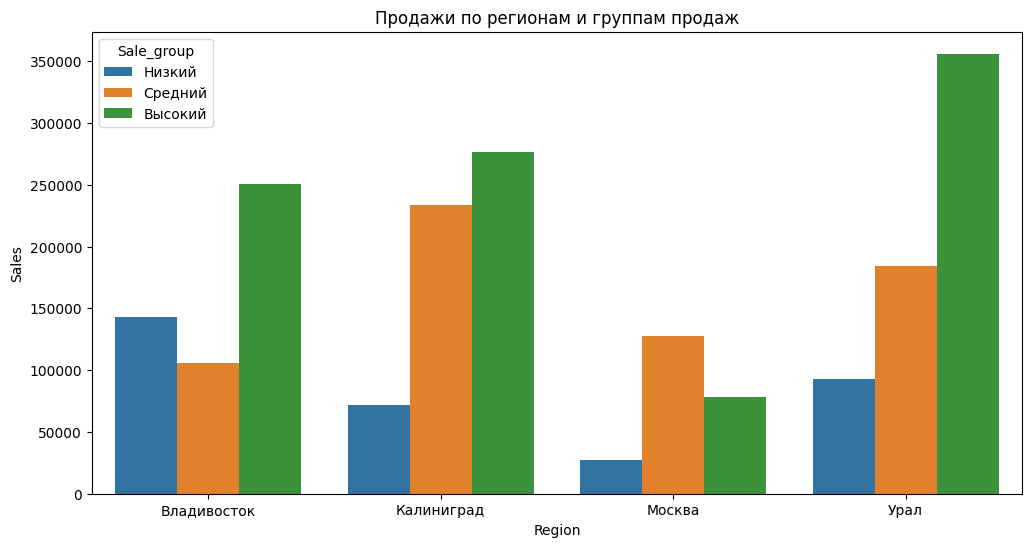

         Region Sale_group     Sales
0   Владивосток     Низкий  142627.0
1   Владивосток    Средний  105755.0
2   Владивосток    Высокий  250972.0
3    Калиниград     Низкий   72181.0
4    Калиниград    Средний  233349.0
5    Калиниград    Высокий  276300.0
6        Москва     Низкий   27082.0
7        Москва    Средний  127954.0
8        Москва    Высокий   77998.0
9          Урал     Низкий   92993.0
10         Урал    Средний  184505.0
11         Урал    Высокий  356026.0


In [25]:
# Задание 3: Группировка продаж по регионам и группам продаж
print("Группировка продаж по регионам и группам продаж:")
print(sales_group_by_region(df))

***Вывод по заданию 3***

- Высокие продажи доминируют во всех регионах, особенно на Урале.
- Низкие продажи заметно выше во Владивостоке и на Урале, тогда как в Москве они значительно меньше.
- В Москве наблюдается сравнительно более равномерное распределение между средними и высокими продажами.

***Итоговый вывод***

Подкатегории Binders, Paper, Furnishings и Phones стабильно держатся в топ-4 подкатегорий по продажам. Каждая из подкатегорий удерживает свои позиции с 1 по 4 место соответственно:
  - Binders         
  - Paper           
  - Furnishings     
  - Phones     

Средняя половина всех продаж и этот диапозон находится в пределах 16000 - 37000.В основном продажи распределены около 25000.

Минимальное значение продаж — около 5000. Максимальное значение продаж — около 45 000.

- Высокие продажи доминируют во всех регионах, особенно на Урале.
- Низкие продажи заметно выше во Владивостоке и на Урале, тогда как в Москве они значительно меньше.
- В Москве наблюдается сравнительно более равномерное распределение между средними и высокими продажами, при том преобладают продажи "средней" категории.